First of all, the necessary libraries:

In [1]:
%matplotlib inline
#pytorch packages
import math
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable
#To download the dataset for torchvision
import torchvision
from torchvision import datasets, transforms
#For plots
import matplotlib.pyplot as plt

# Download and look at the data

For this example, we will try to recognize hand-written digits, specifically the ones of the MNIST dataset, that contains overall 70,000 28-by-28-pixels pictures of hand-written digits. This dataset is easily accessible in pytorch via dataset.MNSIT. You just have to specify you want to download it if it's not already in the directory, and pytorch will process it to create a DataSet.

In [2]:
#Change to the directory of your choice.
PATH = '.'

Grab the training and the test set.

In [3]:
trn_set = datasets.MNIST(PATH, train=True, download=True)
tst_set = datasets.MNIST(PATH, train=False, download=True)

100.1%

Extracting .\MNIST\raw\train-images-idx3-ubyte.gz to .\MNIST\raw


113.5%

Extracting .\MNIST\raw\train-labels-idx1-ubyte.gz to .\MNIST\raw


100.4%

Extracting .\MNIST\raw\t10k-images-idx3-ubyte.gz to .\MNIST\raw


180.4%C:\tools\IDEs\Anaconda3\envs\pytorch_class\lib\site-packages\torchvision\datasets\mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Extracting .\MNIST\raw\t10k-labels-idx1-ubyte.gz to .\MNIST\raw
Processing...
Done!


Let's have a look at the data in the training set first.

In [4]:
len(trn_set.train_data), len(tst_set.test_data)

C:\tools\IDEs\Anaconda3\envs\pytorch_class\lib\site-packages\torchvision\datasets\mnist.py:58: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
C:\tools\IDEs\Anaconda3\envs\pytorch_class\lib\site-packages\torchvision\datasets\mnist.py:63: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")


(60000, 10000)

Each image is represented by a tensor of size 28 by 28, each value represents the color of the corresponding pixel, from 0 (black) to 255 (white). Torch tensors are the equivalent of numpy ndarrays.

In [5]:
trn_set.train_data[0]

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

It's easy to convert a torch tensor to a numpy array via the .numpy() command.

Conversely, you can create a torch Tensor from a numpy array x via torch.Tensor(x)

In [6]:
trn_set.train_data[0].numpy()

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

It's then easy to see the corresponding picture via plt.

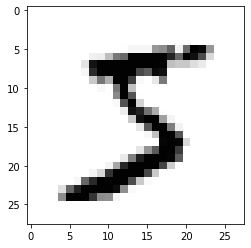

In [7]:
plt.imshow(trn_set.train_data[0].numpy(), cmap='Greys')

Let's have a look at the corresponding label...

In [8]:
trn_set.train_labels[0]

C:\tools\IDEs\Anaconda3\envs\pytorch_class\lib\site-packages\torchvision\datasets\mnist.py:48: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


tensor(5)

# Preparing the data

A pytorch neural network will expect the data to come in the form of minibatches of tensors. To do that, we use a pytorch object called DataLoader. It will randomly separate the pictures (with the associated label) in minibatches. If you have multiple GPUs, it also prepares the work to be parallelized between them (just change num_workers from 0 to your custom value). We only shuffle the data randomly for the training.

First we need to explicitely ask our dataset to transform the images in tensors.

In [9]:
tsfms = transforms.ToTensor()
trn_set = datasets.MNIST(PATH, train=True, download=True, transform=tsfms)
tst_set = datasets.MNIST(PATH, train=False, download=True, transform=tsfms)

In [10]:
trn_loader = torch.utils.data.DataLoader(trn_set, batch_size=64, shuffle=True, num_workers=0)
tst_loader = torch.utils.data.DataLoader(tst_set, batch_size=64, shuffle=False, num_workers=0)

Let's have a look at an example. A data loader can be converted into an iterator and we can then ask him for a minibatch.

In [11]:
mb_example = next(iter(trn_loader))

Such a minibacth containts two torch tensors: the first one contains the data (here our pictures) and the second one the expected labels.

In [12]:
mb_example[0].size(), mb_example[1].size()

(torch.Size([64, 1, 28, 28]), torch.Size([64]))

Note that pytorch has automatically added one dimension to our images (the 1 in second position). It would be 3 if we had had the three usual channels for the colors (RGB). Pytorch puts this channel in the second dimension and not the last because it simplifies some computation.

Let's see the first tensor.

In [13]:
mb_example[0][0,0]

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.7490, 1.0000, 0.2510,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

Note that pytorch transformed the values that went from 0 to 255 into floats that go from 0. to 1.

We can have a look at the first pictures and draw them.

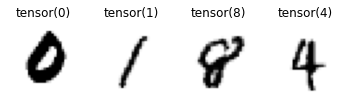

In [14]:
fig = plt.figure()
for i in range(0,4):
    sub_plot = fig.add_subplot(1,4,i+1)
    sub_plot.axis('Off')
    plt.imshow(mb_example[0][i,0].numpy(), cmap='Greys')
    sub_plot.set_title(mb_example[1][i])

Another usual transformation we do before feeing the pictures to our neural network is to normalize the input. This means subtracting the mean and dividing by the standard deviation. We can either search for the usual values on Google or compute them from scratch.

In [21]:
mean = torch.mean(trn_set.train_data.type(torch.FloatTensor))/255.
std = torch.std(trn_set.train_data.type(torch.FloatTensor))/255.
mean,std

(tensor(0.1307), tensor(0.3081))

We divide by 255 to get the means of our data when it's convereted into floats from 0. to 1.

Then we go back to creating a transfrom and add the normalization. Note that we use the same mean and std for the test set. Afterward, we reload our datasets, adding this transform.

In [22]:
tsfms = transforms.Compose([transforms.ToTensor(), transforms.Normalize((mean,), (std,))])
trn_set = datasets.MNIST(PATH, train=True, download=True, transform=tsfms)
tst_set = datasets.MNIST(PATH, train=False, download=True, transform=tsfms)

In [23]:
trn_loader = torch.utils.data.DataLoader(trn_set, batch_size=64, shuffle=True, num_workers=0)
tst_loader = torch.utils.data.DataLoader(tst_set, batch_size=64, shuffle=False, num_workers=0)

Now if we want to plot our digits, we will have to denormalize the images.

In [24]:
mb_example = next(iter(trn_loader))

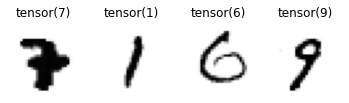

In [27]:
fig = plt.figure()
for i in range(0,4):
    sub_plot = fig.add_subplot(1,4,i+1)
    sub_plot.axis('Off')
    plt.imshow(mb_example[0][i,0] * std + mean, cmap='Greys', interpolation=None)
    sub_plot.set_title(mb_example[1][i])

# Create a model

It's always a good idea to create a model as a subclass of nn.Module. That way, we can use all the features this class provides.

We override the init function (but still call the init function of nn.Module) to define our custom layers (here two linear layers) and we have to define the forward function, which explains how to compute the output.

The first line of the forward function is to flatten our input, since we saw it has four dimensions: minibatch by channel by height by width. We only keep the minibatch size as our first dimension (x.size(0)) and the -1 is to tell pytorch to determine the right number for the second dimension.

In [28]:
class SimpleNeuralNet(nn.Module):
    def __init__(self, n_in, n_hidden, n_out):
        super().__init__()
        self.linear1 = nn.Linear(n_in, n_hidden)
        self.linear2 = nn.Linear(n_hidden, n_out)
    
    def forward(self,x):
        x = x.view(x.size(0),-1)
        x = F.relu(self.linear1(x))
        return F.log_softmax(self.linear2(x), dim=-1)

Then we can instanciate the class with our input size (28 * 28), an hidden size of 100 layers and 10 outputs (as many as digits).

The optimizer will automatically do the Stochastic Gradient Descent for us (or any of its variant if we want).

In [29]:
net = SimpleNeuralNet(28*28,100,10)
optimizer = optim.SGD(net.parameters(),lr=1e-2)

Now we're ready to write our training loop. To compute the gradient automatically, pytorch requires us to put the torch tensors with our inputs and labels into Variable objects, that way it'll remember the transformation these go through until we arrive at our loss function. We then call loss.backward() to compute all the gradients (which will then be in the grad field of any variable).

The optimizer takes care of the step of our gradient descent in the optimizer.step() function. Since the gradients are accumulated, we have to tell pytorch when to reinitialize them (which the purpose of the optimizer.zero_grad() command at the beginning).

In [32]:
def train(nb_epoch):
    for epoch in range(nb_epoch):
        running_loss = 0.
        corrects = 0
        print(f'Epoch {epoch+1}:')
        for data in trn_loader:
            #separate the inputs from the labels
            inputs,labels = data
            #wrap those into variables to keep track of how they are created and be able to compute their gradient.
            inputs, labels = Variable(inputs), Variable(labels)
            #Put the gradients back to zero
            optimizer.zero_grad()
            #Compute the outputs given by our model at this stage.
            outputs = net(inputs)
            _,preds = torch.max(outputs.data,1)
            #Compute the loss
            loss = F.nll_loss(outputs, labels)
            running_loss += loss.data * inputs.size(0)
            corrects += torch.sum(labels.data == preds)
            #Backpropagate the computation of the gradients
            loss.backward()
            #Do the step of the SGD
            optimizer.step()
        print(f'Loss: {running_loss/len(trn_set)}  Accuracy: {100.*corrects/len(trn_set)}')

Now we're ready to train our model.

In [33]:
train(10)

Epoch 1:
Loss: 0.5853068232536316  Accuracy: 84.9800033569336
Epoch 2:
Loss: 0.30118703842163086  Accuracy: 91.3566665649414
Epoch 3:
Loss: 0.25516441464424133  Accuracy: 92.6816635131836
Epoch 4:
Loss: 0.2240198254585266  Accuracy: 93.63666534423828
Epoch 5:
Loss: 0.19984345138072968  Accuracy: 94.33833312988281
Epoch 6:
Loss: 0.18068507313728333  Accuracy: 94.90666961669922
Epoch 7:
Loss: 0.164964959025383  Accuracy: 95.34666442871094
Epoch 8:
Loss: 0.1519738882780075  Accuracy: 95.69000244140625
Epoch 9:
Loss: 0.14120538532733917  Accuracy: 96.01166534423828
Epoch 10:
Loss: 0.13153965771198273  Accuracy: 96.30000305175781


96.3% accuracy is good, but that's on the training set and we may be overfitting. Let's try on the test set now to see if we're doing well or not.

In [36]:
def validate():
    running_loss = 0.
    corrects = 0
    for data in tst_loader:
        #separate the inputs from the labels
        inputs,labels = data
        #wrap those into variables to keep track of how they are created and be able to compute their gradient.
        #Even if we don't require the gradient here, a nn.Module expects a variable.
        inputs, labels = Variable(inputs), Variable(labels)
        #Compute the outputs given by our model at this stage.
        outputs = net(inputs)
        _,preds = torch.max(outputs.data,1)
        #Compute the loss
        loss = F.nll_loss(outputs, labels)
        running_loss += loss.data * inputs.size(0)
        corrects += torch.sum(labels.data == preds)
    print(f'Loss: {running_loss/len(tst_set)}  Accuracy: {100.*corrects/len(tst_set)}')

In [37]:
validate()

Loss: 0.13313183188438416  Accuracy: 96.0199966430664


So we weren't overfitting!

# Learning rate finder

The details of how this code has been built are all explained in this [blog article](https://sgugger.github.io/how-do-you-find-a-good-learning-rate.html).

In [39]:
def find_lr(init_value = 1e-8, final_value=10., beta = 0.98):
    num = len(trn_loader)-1
    mult = (final_value / init_value) ** (1/num)
    lr = init_value
    optimizer.param_groups[0]['lr'] = lr
    avg_loss = 0.
    best_loss = 0.
    batch_num = 0
    losses = []
    log_lrs = []
    for data in trn_loader:
        batch_num += 1
        #As before, get the loss for this mini-batch of inputs/outputs
        inputs,labels = data
        inputs, labels = Variable(inputs), Variable(labels)
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        #Compute the smoothed loss
        avg_loss = beta * avg_loss + (1-beta) *loss.data
        smoothed_loss = avg_loss / (1 - beta**batch_num)
        #Stop if the loss is exploding
        if batch_num > 1 and smoothed_loss > 4 * best_loss:
            return log_lrs, losses
        #Record the best loss
        if smoothed_loss < best_loss or batch_num==1:
            best_loss = smoothed_loss
        #Store the values
        losses.append(smoothed_loss)
        log_lrs.append(math.log10(lr))
        #Do the SGD step
        loss.backward()
        optimizer.step()
        #Update the lr for the next step
        lr *= mult
        optimizer.param_groups[0]['lr'] = lr
    return log_lrs, losses
    

Now we can define our neural net as before.

In [40]:
net = SimpleNeuralNet(28*28,100,10)
optimizer = optim.SGD(net.parameters(),lr=1e-1)
criterion = F.nll_loss

Then plot the losses versus the logs of the learning rate

In [41]:
logs,losses = find_lr()

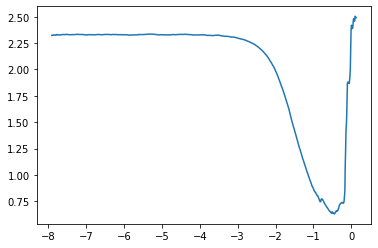

In [45]:
plt.plot(logs[10:-5],losses[10:-5])

This suggests the best learning rate is $10^{-1}$ so we can use test this one after defining a new network.

In [46]:
net = SimpleNeuralNet(28*28,100,10)
optimizer = optim.SGD(net.parameters(),lr=1e-1)
train(1)

Epoch 1:
Loss: 0.268404483795166  Accuracy: 92.14167022705078


We are already at 92.21% accuracy when the learning rate used before gave us 84.86% in one epoch!

# Gradient Methods
## Momentum
---
![title](img/speedup1.png)
The traditional method of updating the neural network parameter W is to add the original W to a negative learning rate and multiply it by the correction value (dx). This method may make the learning process extremely tortuous, and it looks like a drunk man walks a lot of detours when he comes home.
![title](img/speedup2.png)
So we put this person from the flat ground onto a slope, as long as he walks a little bit downhill, because of the downward inertia, he unconsciously walks down, and the detours are reduced. It is the Momentum.

---
--CLASS torch.optim.SGD(params, lr=<required parameter>, momentum=0, dampening=0, weight_decay=0, nesterov=False)<br>
### Parameters<br>
- params (iterable) – iterable of parameters to optimize or dicts defining parameter groups

- lr (float) – learning rate

- momentum (float, optional) – momentum factor (default: 0)

- weight_decay (float, optional) – weight decay (L2 penalty) (default: 0)

- dampening (float, optional) – dampening for momentum (default: 0)

- nesterov (bool, optional) – enables Nesterov momentum (default: False)

## AdaGrad 
---
![title](img/speedup3.png)

---
CLASS torch.optim.Adagrad(params, lr=0.01, lr_decay=0, weight_decay=0, initial_accumulator_value=0, eps=1e-10)<br>
### Parameters<br>
- params (iterable) – iterable of parameters to optimize or dicts defining parameter groups

- lr (float, optional) – learning rate (default: 1e-2)

- lr_decay (float, optional) – learning rate decay (default: 0)

- weight_decay (float, optional) – weight decay (L2 penalty) (default: 0)

- eps (float, optional) – term added to the denominator to improve numerical stability (default: 1e-10)

## RMSprop
---
![title](img/speedup4.png)

---
CLASS torch.optim.RMSprop(params, lr=0.01, alpha=0.99, eps=1e-08, weight_decay=0, momentum=0, centered=False)
### Parameters<br>
- params (iterable) – iterable of parameters to optimize or dicts defining parameter groups

- lr (float, optional) – learning rate (default: 1e-2)

- momentum (float, optional) – momentum factor (default: 0)

- alpha (float, optional) – smoothing constant (default: 0.99)

- eps (float, optional) – term added to the denominator to improve numerical stability (default: 1e-8)

- centered (bool, optional) – if True, compute the centered RMSProp, the gradient is normalized by an estimation of its variance

- weight_decay (float, optional) – weight decay (L2 penalty) (default: 0)

## Adam
---
![title](img/speedup5.png)

---
CLASS torch.optim.Adam(params, lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)<br>
### Parameters<br>
- params (iterable) – iterable of parameters to optimize or dicts defining parameter groups

- lr (float, optional) – learning rate (default: 1e-3)

- betas (Tuple[float, float], optional) – coefficients used for computing running averages of gradient and its square (default: (0.9, 0.999))

- eps (float, optional) – term added to the denominator to improve numerical stability (default: 1e-8)

- weight_decay (float, optional) – weight decay (L2 penalty) (default: 0)

- amsgrad (boolean, optional) – whether to use the AMSGrad variant of this algorithm from the paper On the Convergence of Adam and Beyond (default: False)

# Home Work
## Question 1
Using the following three optimizers（Momentum, RMSProp, Adam） to train the data in MNIST, find the appropriate learning rate and the accuracy of recognizing handwritten digits can reach more than 95% within ten epochs.

In [162]:
net_SGD = SimpleNeuralNet(28*28,100,10)
net_Momentum = SimpleNeuralNet(28*28,100,10)
net_RMSProp = SimpleNeuralNet(28*28,100,10)
net_Adam = SimpleNeuralNet(28*28,100,10)
 
nets = [net_SGD, net_Momentum, net_RMSProp, net_Adam]
 
opt_SGD = torch.optim.SGD(net_SGD.parameters(), lr=1e-1)
opt_Momentum = torch.optim.SGD(net_Momentum.parameters(), lr=1e-1, momentum=0.9)# You can change the learning rate or any other parameters 
opt_RMSProp = torch.optim.RMSprop(net_RMSProp.parameters(), lr=1e-1, alpha=0.9)# You can change the learning rate or any other parameters
opt_Adam = torch.optim.Adam(net_Adam.parameters(), lr=1e-1, betas=(0.9, 0.99))# You can change the learning rate or any other parameters
#loss_his = [[], [], [], []]

## Example: SDG

In [163]:
def train_SGD(nb_epoch):
    for epoch in range(nb_epoch):
        running_loss = 0.
        corrects = 0
        print(f'Epoch {epoch+1}:')
        for data in trn_loader:
            #separate the inputs from the labels
            inputs,labels = data
            #wrap those into variables to keep track of how they are created and be able to compute their gradient.
            inputs, labels = Variable(inputs), Variable(labels)
            #Put the gradients back to zero
            opt_SGD.zero_grad()
            #Compute the outputs given by our model at this stage.
            outputs = net_SGD(inputs)
            _,preds = torch.max(outputs.data,1)
            #Compute the loss
            loss = F.nll_loss(outputs, labels)
            running_loss += loss.data * inputs.size(0)
            corrects += torch.sum(labels.data == preds)
            #Backpropagate the computation of the gradients
            loss.backward()
            #Do the step of the SGD
            opt_SGD.step()
        print(f'Loss: {running_loss/len(trn_set)}  Accuracy: {100.*corrects/len(trn_set)}')


In [164]:
train_SGD(10)

Epoch 1:
Loss: 0.26417237520217896  Accuracy: 92.22833251953125
Epoch 2:
Loss: 0.11616211384534836  Accuracy: 96.53500366210938
Epoch 3:
Loss: 0.08202864229679108  Accuracy: 97.55999755859375
Epoch 4:
Loss: 0.06427153199911118  Accuracy: 98.0433349609375
Epoch 5:
Loss: 0.051903363317251205  Accuracy: 98.47833251953125
Epoch 6:
Loss: 0.04215460270643234  Accuracy: 98.76166534423828
Epoch 7:
Loss: 0.03457197919487953  Accuracy: 98.96833038330078
Epoch 8:
Loss: 0.028702011331915855  Accuracy: 99.16166687011719
Epoch 9:
Loss: 0.02329939417541027  Accuracy: 99.3566665649414
Epoch 10:
Loss: 0.019391683861613274  Accuracy: 99.49333190917969


## Write your answer below：

## Question 2：
Use the neural network defined below to train the CIFRA10 data set, classify the images in the data set and print out the classification accuracy of the test set.
![title](img/di-01.png)

Data and network have been prepared for you, your next task will be:
- Choose the loss function and optimizer
- Use the learning rate finder method to find the appropriate learning rate for the optimizer.
- Training a neural network
- Test training results

In [ ]:
import torch
import torchvision
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np


## Import data using torchvision

In [166]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))  
])

trainset = torchvision.datasets.CIFAR10(
    root='./data',train=True,download=True,transform=transform
)


trainLoader = torch.utils.data.DataLoader(
    trainset,batch_size=4,shuffle=True,num_workers=0
)

testSet = torchvision.datasets.CIFAR10(
    root="./data",train=False,download=True,transform=transform
)

testLoader = torch.utils.data.DataLoader(testSet,batch_size=4,shuffle=False,num_workers=0)

classes =  ('airplane', 'automobile', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


100.0%

Extracting ./data\cifar-10-python.tar.gz to ./data
Files already downloaded and verified


## Define a neural network

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.conv1 = nn.Conv2d(3,6,5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(16*5*5,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)

    def forward(self,x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1,16*5*5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
